# SI221 - TP K-nearest neighbors

### Données

Nous allons travailler sur des images de chiffres manuscrits (de 0 à 9), provenant du dataset MNIST. Ces images, de 28$\times$28 pixels, sont présentées comme des vecteurs lignes d'entiers compris entre $0$ et $255$. On y associe des étiquettes, indiquant quel est le chiffre représenté sur l'image (ici, l'étiquette correspondant au chiffre '0' est '10'. 

In [1]:
import numpy as np
import scipy.io

In [3]:
# Careful, we need to convert the data to float - if we keep the encoding as 8-bit integer,
# we will certainly have issues when applying numpy functions to the data 
train_data = scipy.io.loadmat('data_app.mat')['x'].astype(float)
test_data = scipy.io.loadmat('data_test.mat')['x'].astype(float)


In [10]:
train_labels = scipy.io.loadmat('data_app.mat')['S'].reshape(-1)
test_labels = scipy.io.loadmat('data_test.mat')['S'].reshape(-1)

Quelle est la taille de l’ensemble d’entraînement et de l’ensemble de test ? Les exemples
sont-ils équirépartis suivant les classes ? Affichez les premières images de l'ensemble d'entraînement ainsi que les étiquettes correspondantes. 

Training set size:  1000
Test set size:  300
Training set class counts:  [  0 116  99  93 105  92  94 117  87 100  97]
Test set class counts:      [ 0 38 28 28 38 24 25 34 31 32 22]


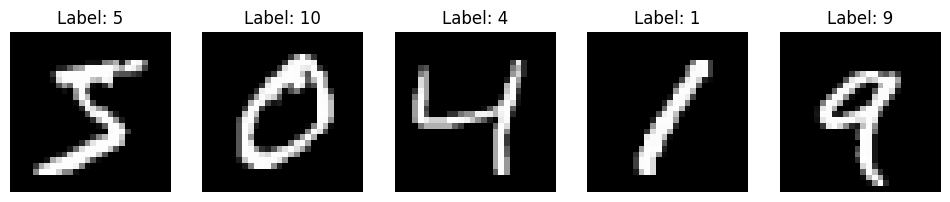

In [17]:
import matplotlib.pyplot as plt

# Size of the training set
train_size = train_data.shape[0]
print("Training set size: ", train_size)

# Size of the test set
test_size = test_data.shape[0]
print("Test set size: ", test_size)

# Check if examples are evenly distributed across classes
train_class_counts = np.bincount(train_labels)
test_class_counts = np.bincount(test_labels)
print("Training set class counts: ", train_class_counts)
print("Test set class counts:     ", test_class_counts)

num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))
for i in range(num_images_to_display):
    axes[i].imshow(train_data[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')
plt.show()

Implémentez la méthode des $k$-plus proche voisins en prenant comme caractéristiques les valeurs des
pixels. On donnera, pour différentes valeurs du paramètre k (k=1, 3, 4, 5):
- Le taux d’erreur.
- La matrice de confusion - La matrice de confusion est une matrice de taille $10\times10$ dont l’élément d’indice (i,j) est le nombre de vecteurs de la classe i qui ont été affectés à la classe j par la méthode.
- Visualisez quelques confusions entre caractères.

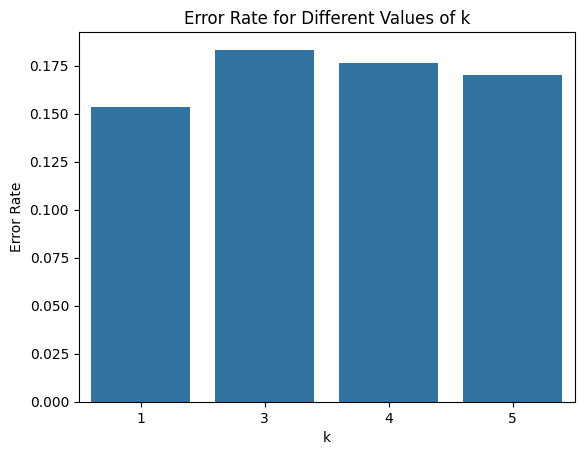

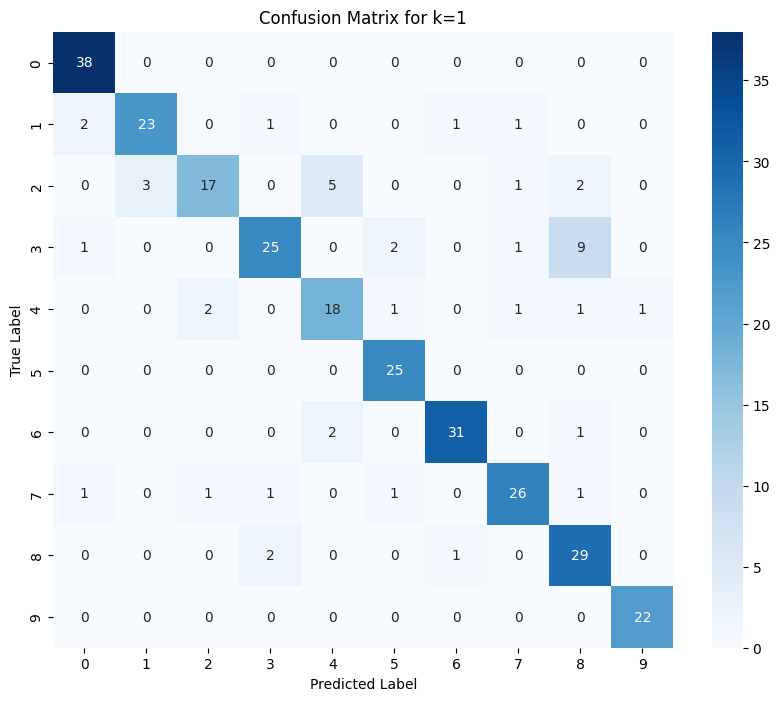

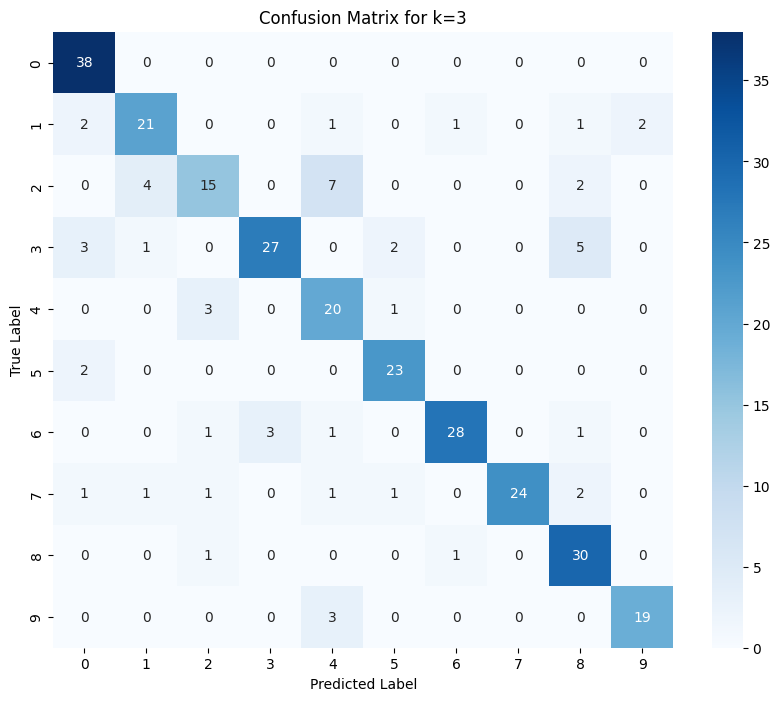

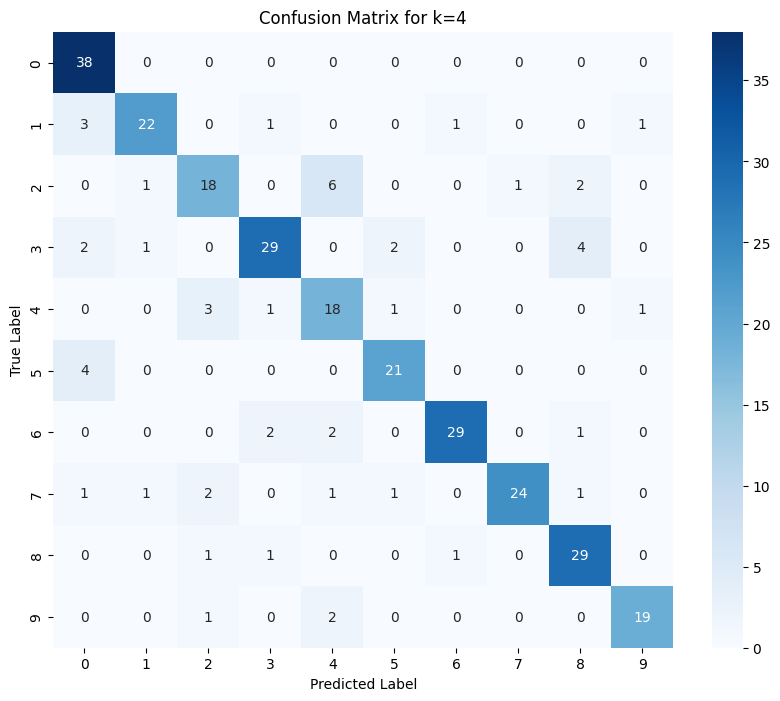

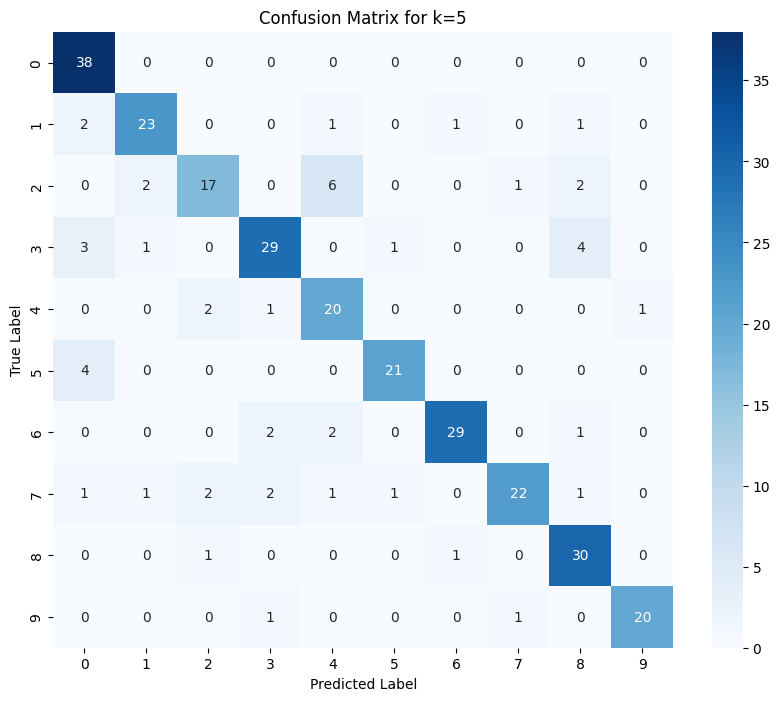

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Define the values of k
k_values = [1, 3, 4, 5]

error_rates = []
confusion_matrices = []

for k in k_values:
    # Create the k-nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(train_data, train_labels)

    # Predict the labels for the test data
    test_predictions = knn.predict(test_data)

    # Calculate the error rate
    error_rate = 1 - accuracy_score(test_labels, test_predictions)
    error_rates.append(error_rate)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(test_labels, test_predictions)
    confusion_matrices.append(confusion_mat)

# Plot the error rates
sns.barplot(x=k_values, y=error_rates)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate for Different Values of k')
plt.show()

# Plot the confusion matrices
for i, k in enumerate(k_values):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

- Construisez des prototypes (au moins un par classe) à partir des images de l’ensemble d’apprentissage, et visualisez-les. Le prototype peut être par exemple la moyenne des exemples correspondants à chaque classe. 
- Classez les images de test en les comparant aux prototypes.
- Comparez avec les résultats obtenus précedemment.

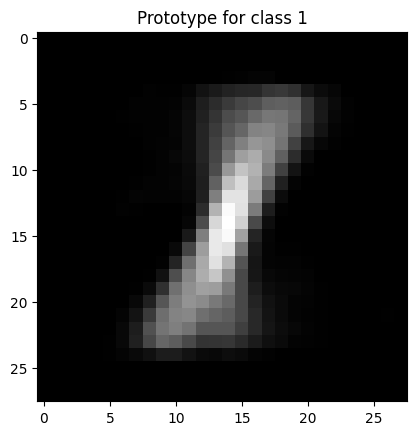

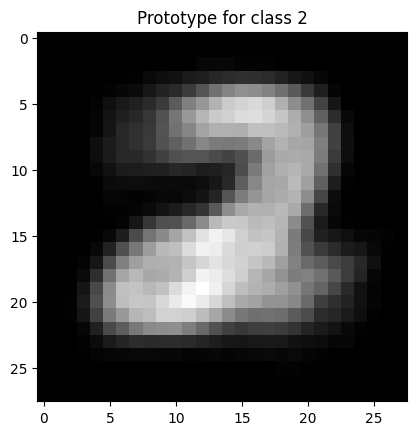

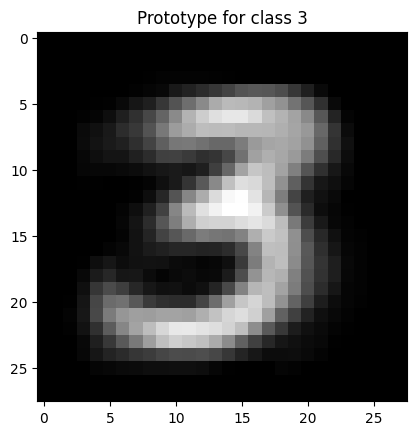

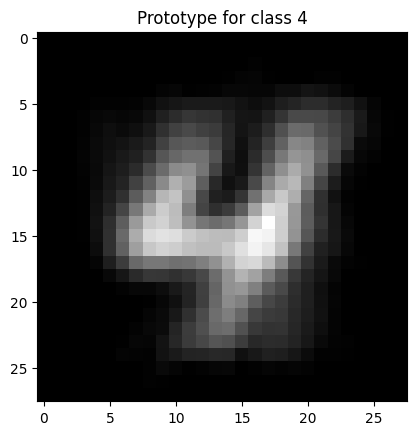

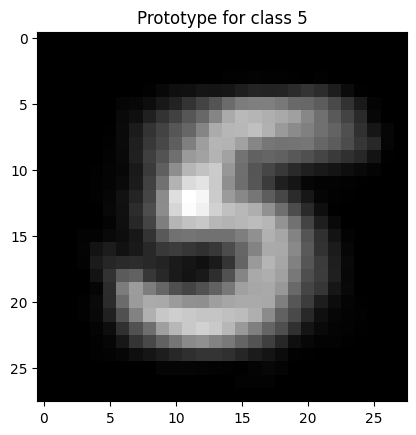

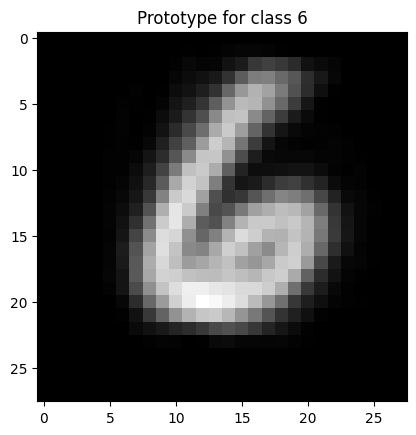

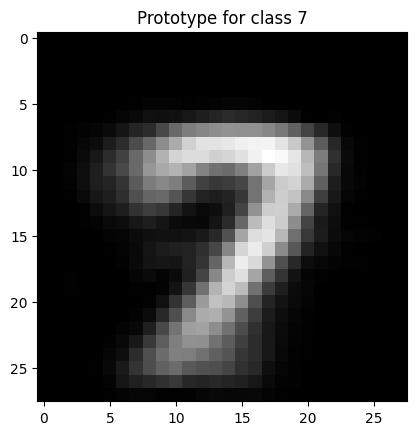

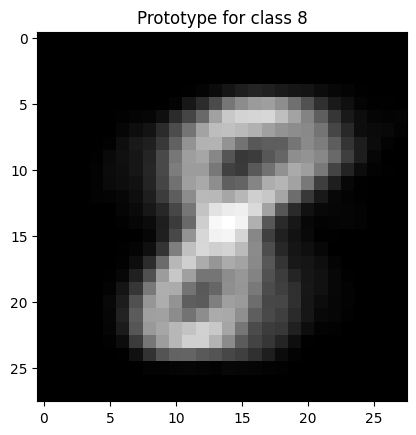

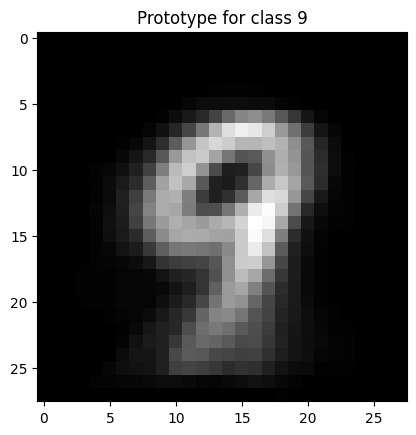

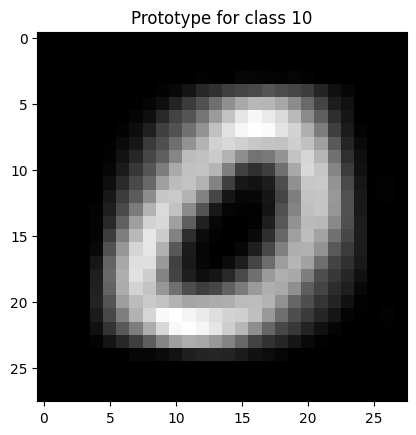

Classification report for KNN:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        38
           2       0.85      0.82      0.84        28
           3       0.77      0.61      0.68        28
           4       0.83      0.76      0.79        38
           5       0.67      0.83      0.74        24
           6       0.91      0.84      0.87        25
           7       0.94      0.85      0.89        34
           8       0.92      0.71      0.80        31
           9       0.77      0.94      0.85        32
          10       0.95      0.91      0.93        22

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

Classification report for Prototype method:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        38
   

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Undefi

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming train_data and train_labels are numpy arrays
# and classes are represented as integers starting from 0

# Get the number of classes
num_classes = np.max(train_labels)

# Compute prototypes
prototypes = np.array([np.mean(train_data[train_labels == i+1], axis=0) for i in range(num_classes)])

# Visualize prototypes
for i, prototype in enumerate(prototypes):
    plt.figure()
    plt.imshow(prototype.reshape(28, 28), cmap='gray')  # Assuming the images are 28x28 pixels
    plt.title(f'Prototype for class {i + 1}')
    plt.show()

# Classify test images
test_predictions = np.argmin([np.linalg.norm(test_data - prototype, axis=1) for prototype in prototypes], axis=0)

# Compare with previous results
print("Classification report for KNN:")
print(classification_report(test_labels, knn.predict(test_data)))
print("Classification report for Prototype method:")
print(classification_report(test_labels, test_predictions))